# Exploratory data analysis

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import used packages

In [21]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame - in our case it is a csv file

In [22]:
df = pd.read_csv('../data/zsu_cv1_data.csv', sep=',')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Pairplot
- Plot pairwise relationships in a dataset
- Scatterplots for multiple pairs of numerical attributes, see [this](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
- Select only numerical attributes from dataframe - *select_dtypes*

In [23]:
df.select_dtypes(include=np.number)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


#### If the dataset has too many columns, it is good to set pandas parameter *display.max_columns* to None so there is no such limit

In [24]:
with pd.option_context('display.max_columns', None):
  display(df.select_dtypes(include=np.number))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


#### Select only an interesting features for paiplot visualization
- The pairplot might be too big to see anything in the visualization

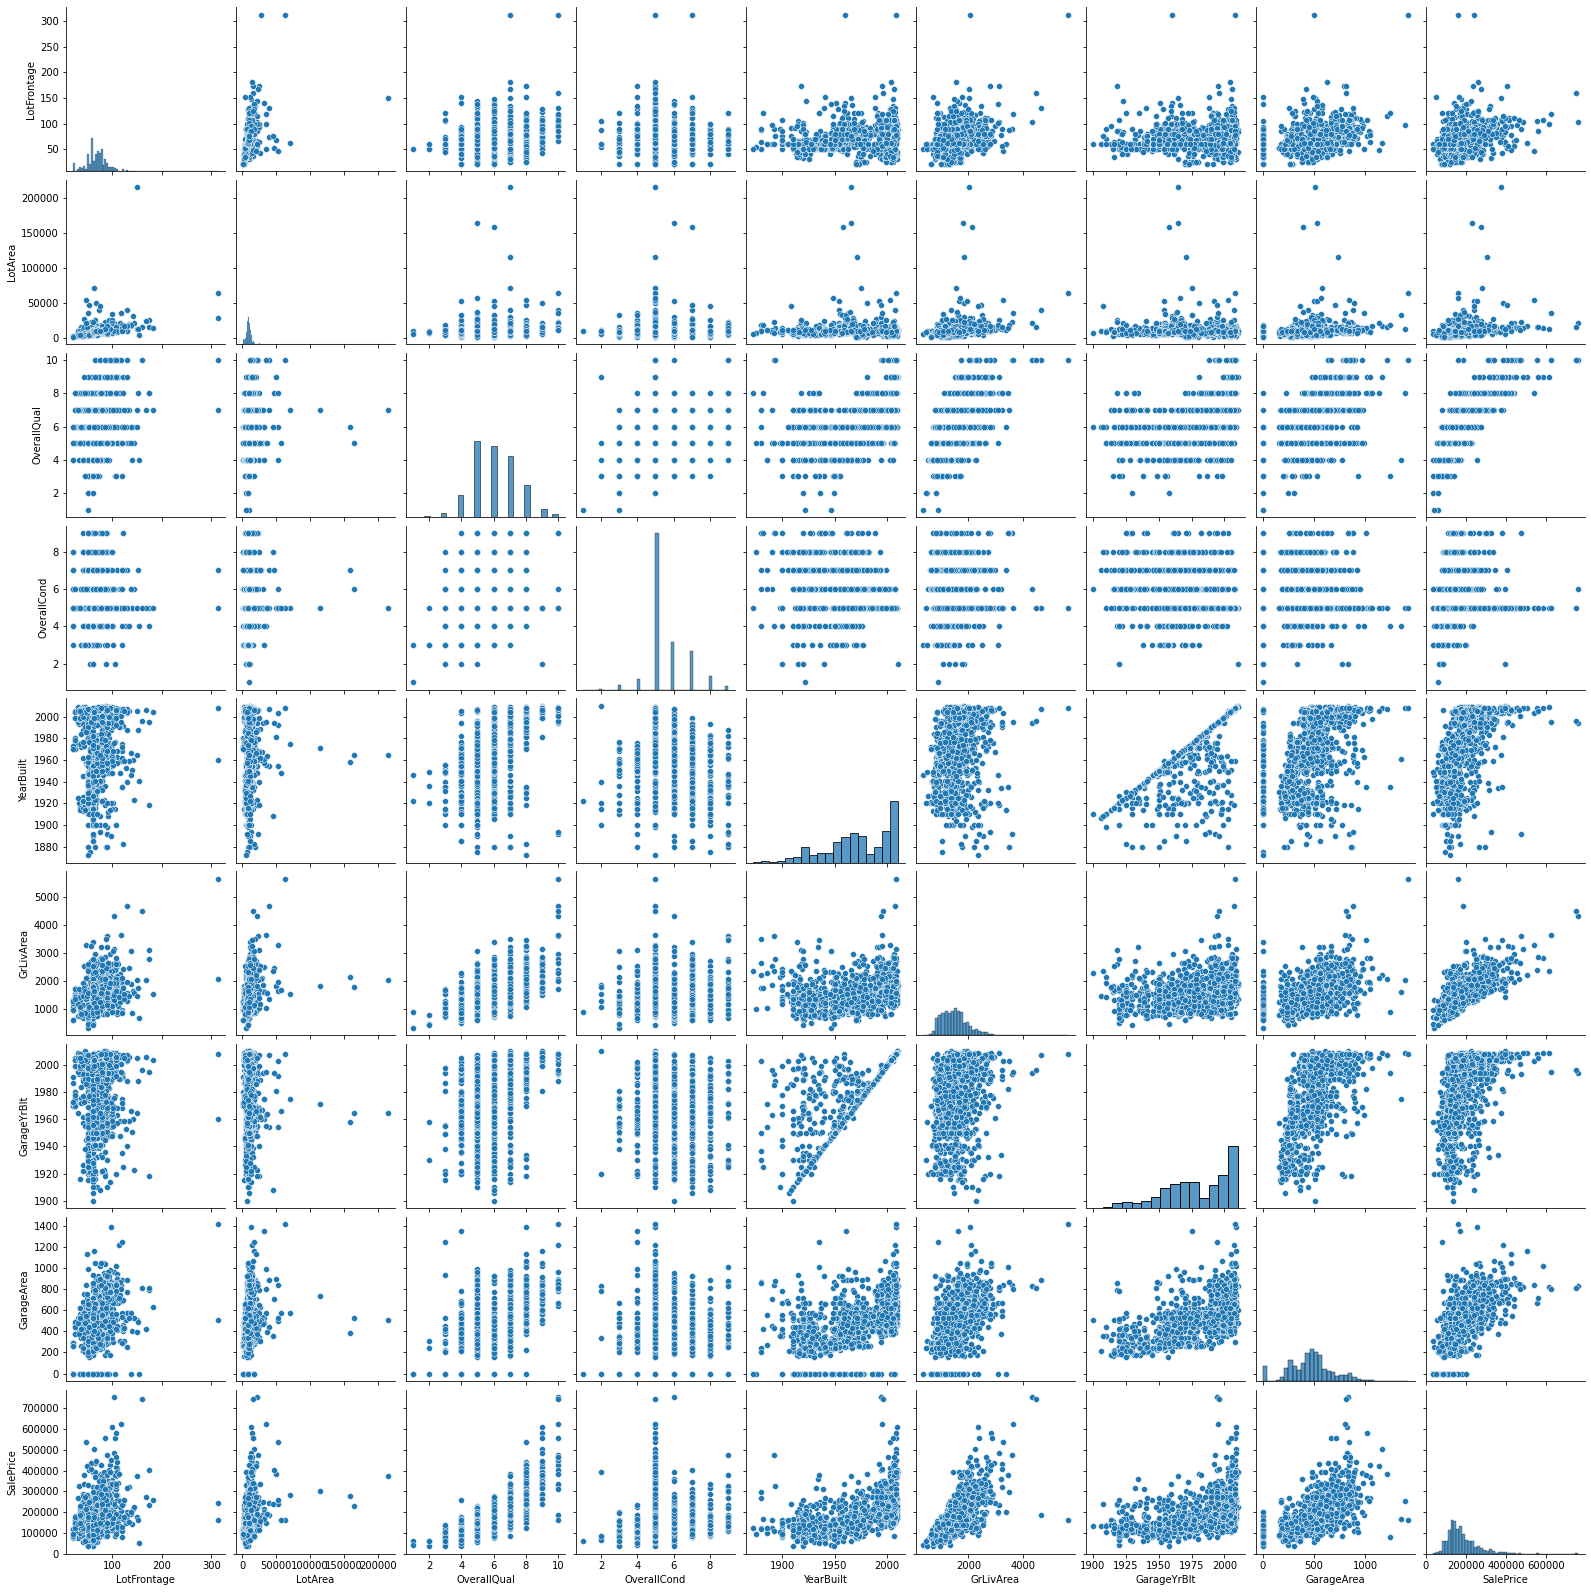

In [25]:
selected_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']
sns.pairplot(df[selected_columns])

#### Notice that both OverallQual and OverallCond columns are rather categorical features even though they are represented by numerical values thus one would expect that the features are numerical but they aren't so scatter plot may not be the best way to visualize this type of data

- Let's select only appropropriate features this time

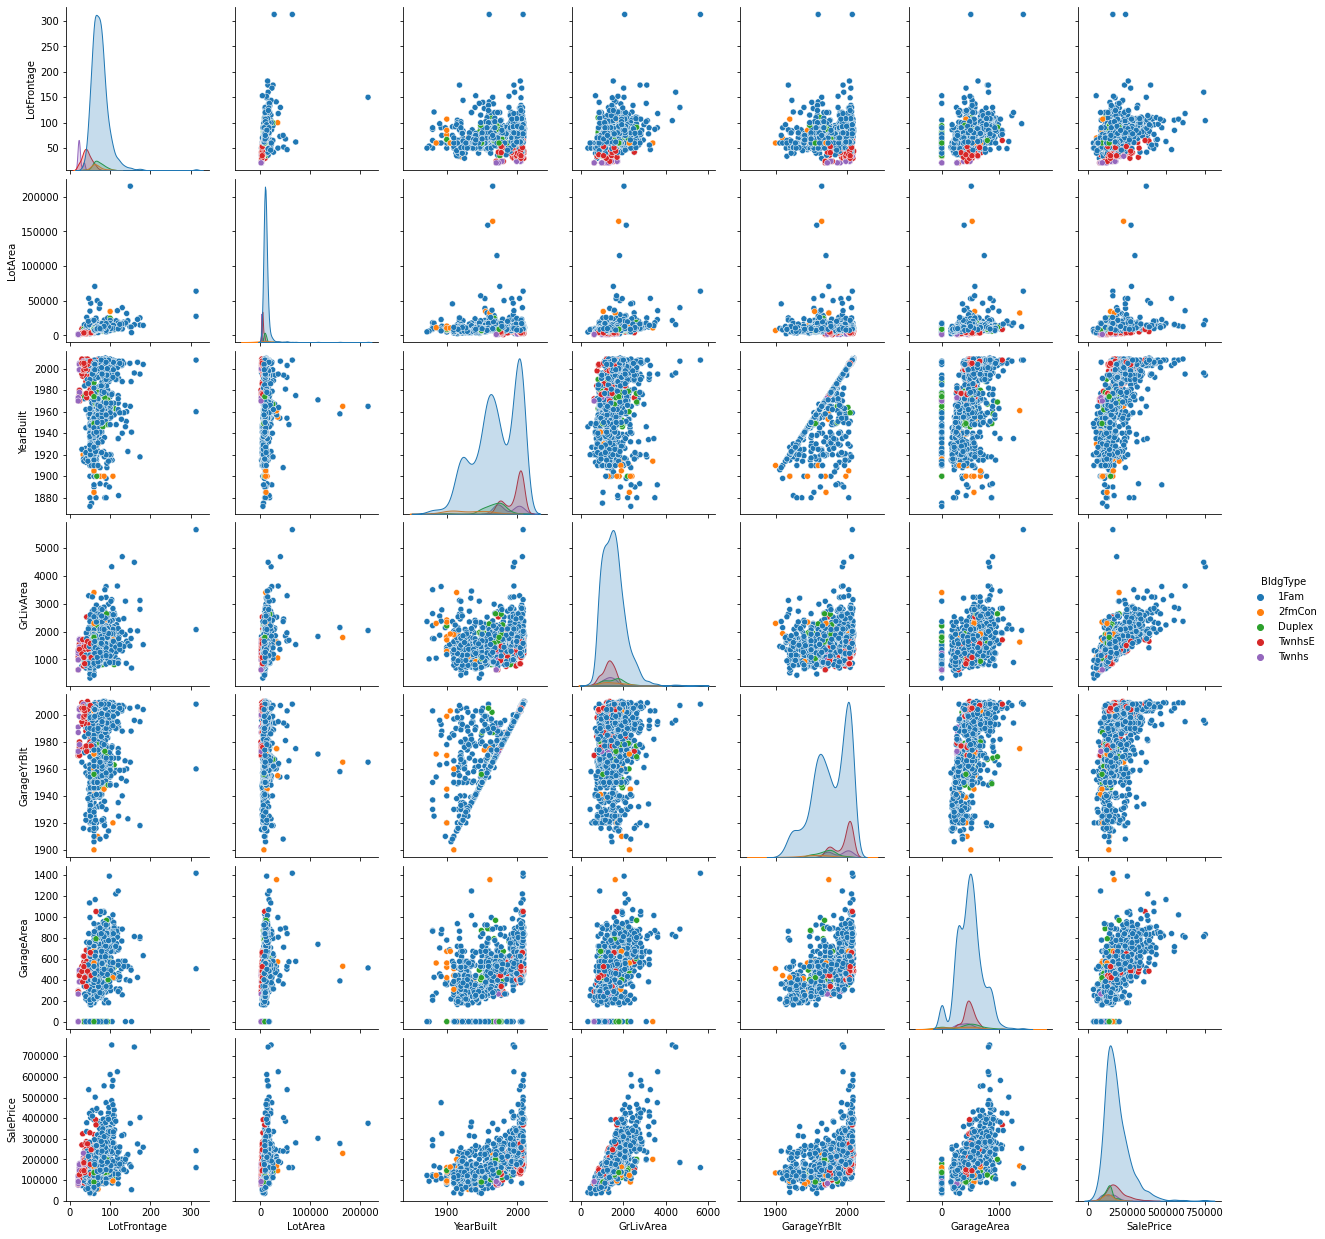

In [26]:
selected_columns = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']
sns.pairplot(data=df, vars=selected_columns, hue='BldgType')

# Are you able to say which categorical attributes effect the price right now?
- Yeah... me neither so let's find out by plotting the data

## Start with selection of only the categorical features

In [27]:
df['OverallQual'] = df.OverallQual.astype(str)
qualitative_columns = df.select_dtypes(exclude=np.number).columns
for c in qualitative_columns:
    if df[c].isnull().any():
        df[c] = df[c].fillna('Missing')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


### Now we need to [melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) the dataset into the standard data format

In [28]:
f = pd.melt(df, id_vars=['SalePrice'], value_vars=qualitative_columns)
f.head()

,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL


### And finally we can use the [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to crate a grid of subplots and map boxplot to every cell

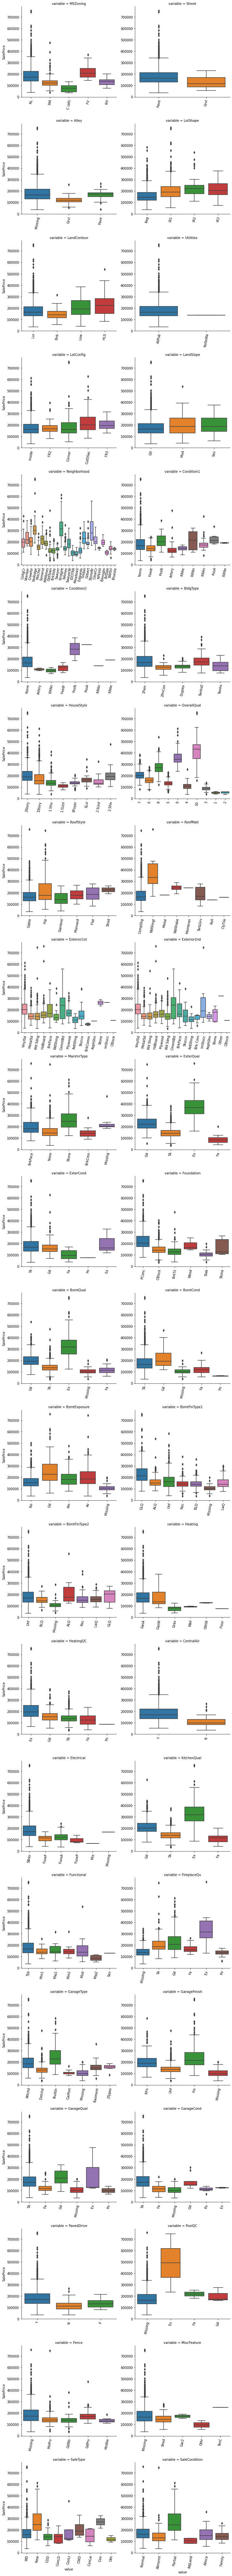

In [29]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    _ = plt.xticks(rotation=80)

g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, height=5)
g.map(boxplot, 'value', 'SalePrice')

## Another very useful feature is the [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function for defining our own grids
### We will plot boxplots together with the individual value counts using barplot for every categorical feature

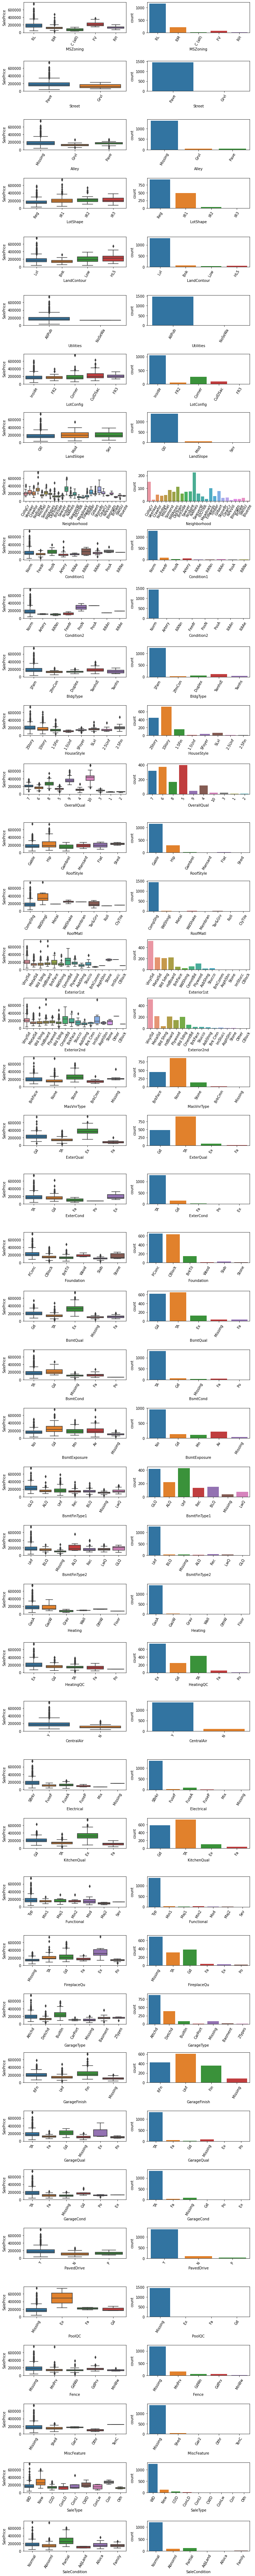

In [10]:
fig, axes = plt.subplots(len(qualitative_columns), 2, figsize=(10, 100))

for i, col in enumerate(qualitative_columns):
    ax_left = fig.axes[2*i]
    ax_right = fig.axes[2*i + 1]
    sns.boxplot(data=df, x=col, y='SalePrice', ax=ax_left)
    ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
    sns.countplot(data=df, x=col, ax=ax_right)
    ax_right.set_xticklabels(ax_right.xaxis.get_majorticklabels(), rotation=60)
        
fig.tight_layout()

# Categorical heatmap
### Let's vizualize a relationship between *HouseStyle* and *Neighborhood* using heatmap with counts of every combination of the two attributes

In [11]:
df_agg = df.groupby(['HouseStyle', 'Neighborhood']).Id.count().reset_index(name='count')
df_agg

,HouseStyle,Neighborhood,count
0,1.5Fin,BrkSide,25
1,1.5Fin,ClearCr,6
2,1.5Fin,Crawfor,9
3,1.5Fin,Edwards,22
4,1.5Fin,Gilbert,1
...,...,...,...
91,SLvl,NWAmes,7
92,SLvl,Sawyer,5
93,SLvl,SawyerW,1
94,SLvl,Timber,4


<AxesSubplot:xlabel='Neighborhood', ylabel='HouseStyle'>

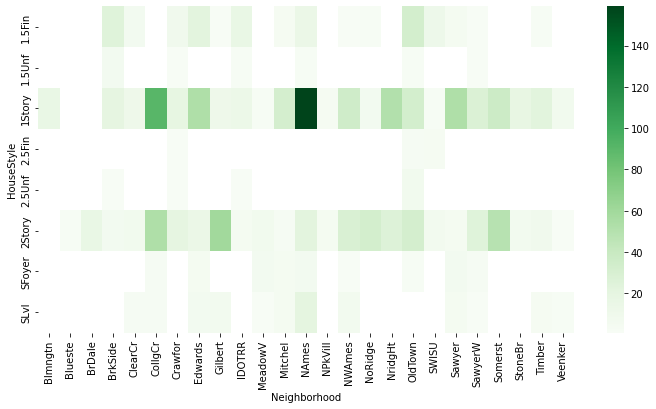

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(data=df_agg.pivot(index='HouseStyle', columns='Neighborhood', values='count'), cmap='Greens')

<AxesSubplot:xlabel='BsmtFinType1', ylabel='HouseStyle'>

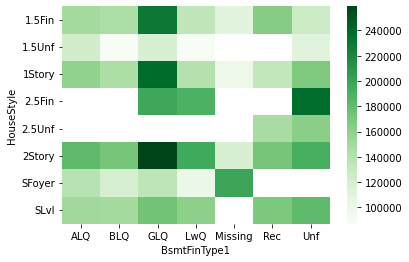

In [13]:
df_agg = df.groupby(['HouseStyle', 'BsmtFinType1']).SalePrice.mean().reset_index(name='mean')
df_agg

sns.heatmap(data=df_agg.pivot(index='HouseStyle', columns='BsmtFinType1', values='mean'), cmap='Greens')


**HouseStyle: Style of dwelling**

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

**BsmtFinType1: Rating of basement finished area**

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

# Correlation
- Take a look at [this link](https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/)
- See also [this](https://www.simplypsychology.org/correlation.html) or [this](https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp) for some more info about the topic

In [14]:
corr_mat = df.corr()
corr_mat

,Id,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.049900,0.111170,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


<AxesSubplot:>

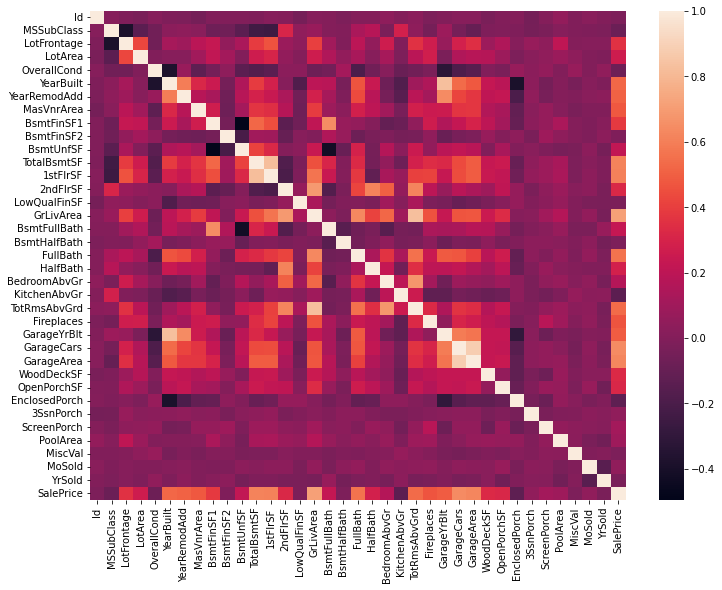

In [15]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat)

## Which color will be more appropropriate for corellation representation?
- Change color map *cmap* (e.g. RdYlGn)
- Set limits to adjust color map values from -1 to 1 (attributes *vmin*, *vmax*)

<AxesSubplot:>

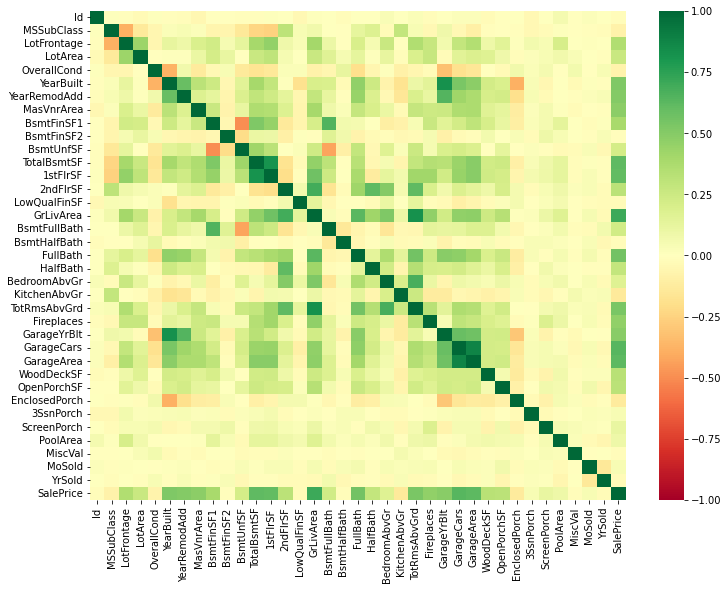

In [16]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, cmap='RdYlGn', vmin=-1, vmax=1)

## What can we say about the values in this correlation sub-matrix?
- Let's focus only some subset of the features

In [17]:
selected_columns = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']
corr_mat = df[selected_columns].corr()
corr_mat

,LotFrontage,LotArea,YearBuilt,GrLivArea,GarageYrBlt,GarageArea,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.402797,0.070250,0.344997,0.351799
LotArea,0.426095,1.000000,0.014228,0.263116,-0.024947,0.180403,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.199010,0.825667,0.478954,0.522897
GrLivArea,0.402797,0.263116,0.199010,1.000000,0.231197,0.468997,0.708624
GarageYrBlt,0.070250,-0.024947,0.825667,0.231197,1.000000,0.564567,0.486362
GarageArea,0.344997,0.180403,0.478954,0.468997,0.564567,1.000000,0.623431
SalePrice,0.351799,0.263843,0.522897,0.708624,0.486362,0.623431,1.000000


<AxesSubplot:>

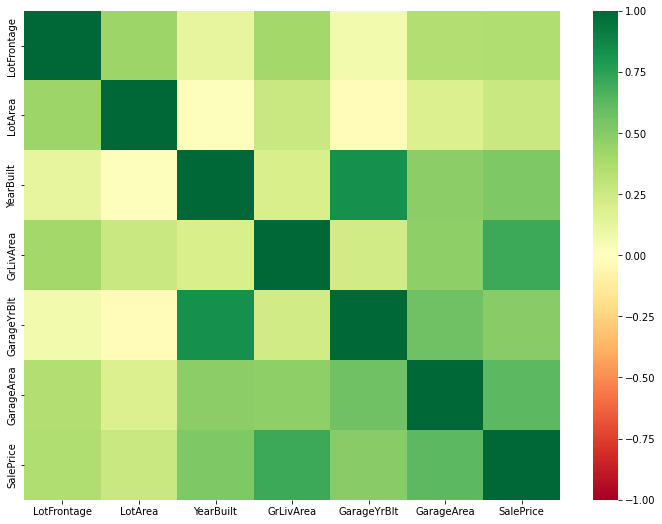

In [18]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, cmap='RdYlGn', vmin=-1, vmax=1)

## Add values to the heatmap and amplify heatmap's readability

<AxesSubplot:>

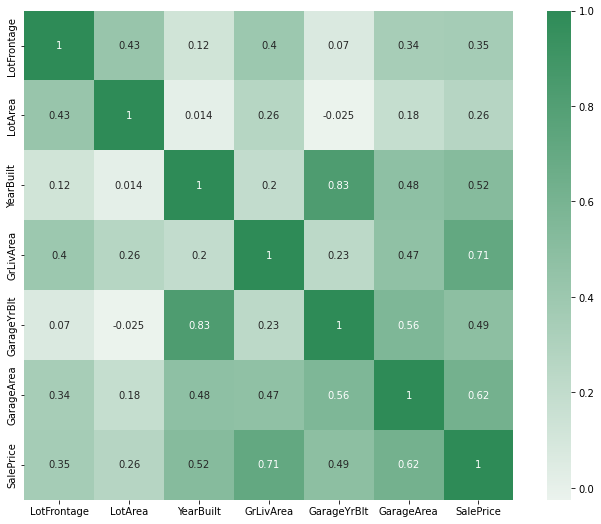

In [19]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, square=True, cmap=sns.light_palette('seagreen', as_cmap=True), annot=True)

# We highly recommend taking a look at the plot gallery for some inspiration!
- https://seaborn.pydata.org/api.html

# Let's try for example scatter plots with regression line fron the example gallery
- What insight does it give us about the trend?

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

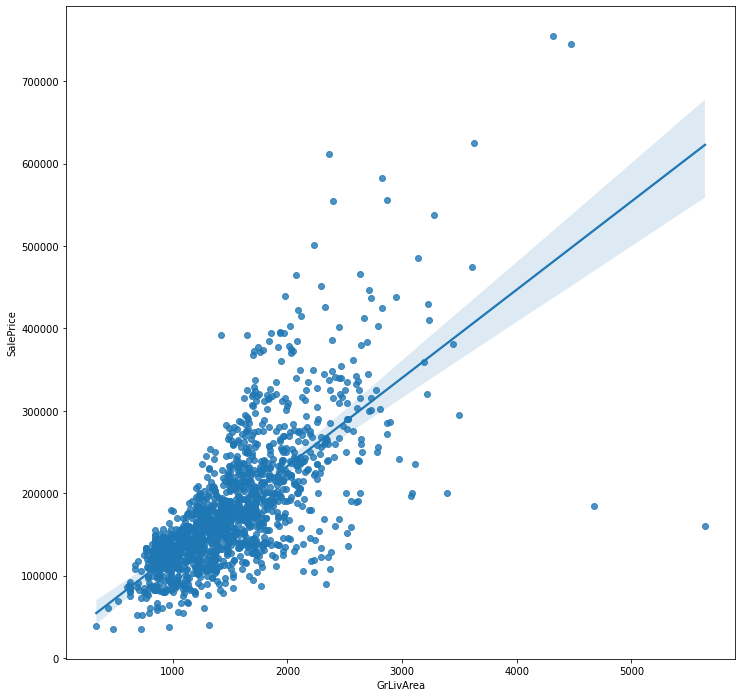

In [20]:
fig = plt.figure(figsize=(12, 12))
sns.regplot(data=df, x=df.GrLivArea, y=df.SalePrice)

# Task (2p)
1. Create two filtered dataframes:
- The first one will contain only the data for BldgType = '1Fam'
- The other one will contain only the data for BldgType = 'Twnhs' or 'TwnhsE'

2. Plot correlation matrices for both of the datasets for the features: ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

3. Do you see any differences or similarities in the correlation matrices? Which features you take as correlated and which are not according to you?
- Write down the insight obtained to the Markdown cell.

<AxesSubplot:>

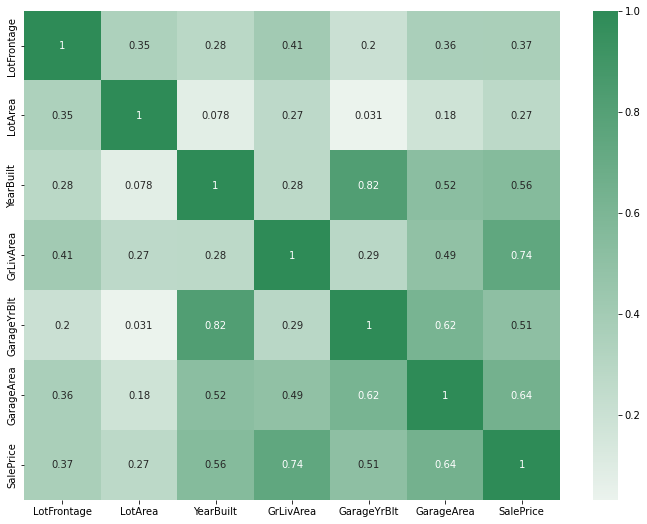

In [34]:
df1 = df.loc[df['BldgType'] == '1Fam']

selected_columns1 = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']
corr_mat1 = df1[selected_columns1].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat1, cmap=sns.light_palette('seagreen', as_cmap=True), annot=True)


V prvnim pripade vypada ze mezi LotArea a LofFrontage neni velka spojitost, narozdil od druheho kde je vyrazna spojitost mezi temi atributy. Celkove v druhem pripade je vice atributu kde corolace presahuje .50, takze maji mezi sebou vetsi spojitost.

<AxesSubplot:>

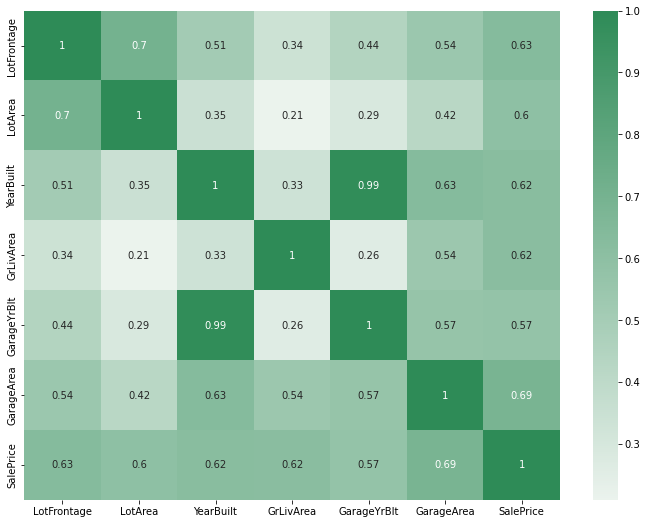

In [35]:
df2 = df.loc[df['BldgType'].isin(['Twnhs', 'TwnhsE'])]

selected_columns2 = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']
corr_mat2 = df2[selected_columns2].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat2, cmap=sns.light_palette('seagreen', as_cmap=True), annot=True)